 ## **Exploração do dataset**

Neste notebook iremos efetuar a exploração dos dados

In [43]:
import re
import string
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [33]:
#read csv to pandas dataframe
df = pd.read_csv('data/dataset_gastric_cancer.csv', sep='#')
print("Número de publicações : " + str(len(df.summary)))

Número de publicações : 112211


Em primeiro lugar usamos o word_tokenizer para vetorizar as palavras de todas as frases das publicações e posteriormente convertemos os tokens para mínusculas

In [41]:
corpus = [word_tokenize(token) for token in df['summary'].apply(str)]
lowercase = [[token.lower() for token in doc] for doc in corpus]
print("Tamanho da publicação 1 vetorizada " + str(len(lowercase[0])))
print("\nPublicação 1 vetorizada")
print(lowercase[0])

Tamanho da publicação 1 vetorizada 646

Publicação 1 vetorizada
['in', 'patients', 'with', 'duodenal', 'ulcer', ',', 'omeprazole', 'plus', 'clarithromycin', '(', 'oc', ')', 'has', 'achieved', 'helicobacter', 'pylori', 'eradication', 'rates', 'of', 'about', '80', '%', ',', 'compared', 'with', '50', '%', 'for', 'omeprazole', 'plus', 'amoxicillin', '(', 'oa', ')', '.', 'the', 'drug', 'acquisition', 'costs', 'for', 'oc', 'are', '102.92', 'pounds', 'sterling', '(', 'pounds', ')', 'compared', 'with', '38.96', 'pounds', 'for', 'oa', 'using', 'generic', 'amoxicillin', 'and', '51.63', 'pounds', 'using', 'the', 'proprietary', 'brand', "'amoxil", "'", '(', 'costs', 'for', '2-week', 'regimens', 'in', '1995', ')', '.', 'the', 'aim', 'of', 'this', 'analysis', 'was', 'to', 'estimate', 'the', 'total', 'healthcare', 'costs', 'to', 'the', 'general', 'practitioner', '(', 'gp', ')', 'of', 'eradication', 'therapy', 'using', 'a', 'simple', 'generalised', 'model', '.', 'data', 'about', 'current', 'practice',

De seguida guardamos os tokens em alpha caso sejam apenas letras do alfabeto

isalpha() retorna :

True - se todos os carateres forem letras do alfabeto.

False - se a string contém um ou mais carateres que não pertencem ao alfabeto.

In [42]:
alphas = [[token for token in doc if token.isalpha()] for doc in lowercase]
print("Tamanho da publicação 1 só com elementos do alfabeto " + str(len(alphas [0])))

Tamanho da publicação 1 só com elementos do alfabeto 544


Como podemos perceber pelos resultados anteriores, o número de palavras da publicação 1 reduziu de 646 para 544 após serem removidas as palavras que continham carateres que não pertenciam ao alfabeto.

Agora, vamos carregar as stop_words, ou seja, palavras mais frequentes da lingua inglesa e filtrar as palavras que não são stop_words

In [45]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
print("Tamanho da publicação 1 removendo as stop_words " + str(len(no_stop[0])))

Tamanho da publicação 1 removendo as stop_words 324


Como podemos perceber pelos resultados anteriores, o número de palavras da publicação 1 reduziu de 544 para 324 após serem removidas as stop_words

Agora iremos usar uma função do nlkt que permite efetuar a lemmatização (remoção dos afixos morfológicos de palavras) das palavras

Exemplo:

CONNECTIONS------> CONNECT

CONNECTED------> CONNECT

CONNECTING------> CONNECT

CONNECTION------> CONNECT

In [48]:
stemmer = PorterStemmer()
stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]

In [49]:
#clean_str = [ ' '.join(doc) for doc in stemmed]
print("\nPublicação 1 antes do tratamento")
print(df.summary[0])
print("\nPublicação 1 depois do tratamento")
print(clean_str[0])


Publicação 1 antes do tratamento
In patients with duodenal ulcer, omeprazole plus clarithromycin (OC) has achieved Helicobacter pylori eradication rates of about 80%, compared with 50% for omeprazole plus amoxicillin (OA). The drug acquisition costs for OC are 102.92 pounds sterling (pounds) compared with 38.96 pounds for OA using generic amoxicillin and 51.63 pounds using the proprietary brand 'Amoxil' (costs for 2-week regimens in 1995). The aim of this analysis was to estimate the total healthcare costs to the general practitioner (GP) of eradication therapy using a simple generalised model. Data about current practice in the UK were obtained from 502 respondents in a survey of hospital specialists and GPs. It was assumed that patients would derive no benefit from eradication therapy unless they had a duodenal ulcer, and that all OA patients received generic amoxicillin. The survey confirmed that OA was the commonest eradication therapy prescribed by UK GPs at that time. Three dist

Analisando o caso da publicação 1, podemos perceber que a mesma se encontra simplificada, não só na sua dimensão como na complexidade das palavras.

## *Exploração do dataset*

In [64]:
nb_words = [len(tokens) for tokens in alphas]
alphas_unique = [set(doc) for doc in alphas]
nb_words_unique = [len(doc) for doc in alphas_unique]

print("Número de palavras na publicação 1: " + str(nb_words[0]))
print("Número de palavras distintas na publicação 1: " + str(nb_words_unique[0]))
print("\nNúmero média de palavras em todas as publicações: " + str(sum(nb_words_unique) / len(nb_words_unique)))
print("Número máximo de palavras em todas as publicações: " + str(max(nb_words_unique)))
print("Número mínimo de palavras em todas as publicações:" + str(min(nb_words_unique)))

Número de palavras na publicação 1: 544
Número de palavras distintas na publicação 1: 200

Número média de palavras em todas as publicações: 95.57218989225655
Número máximo de palavras em todas as publicações: 552
Número mínimo de palavras em todas as publicações:0


In [69]:
sentence = [ ' '.join(doc) for doc in lowercase_train]
nb_characters = [len(doc) for doc in sentence]

print("Número de caracteres na publicação 1: " + str(nb_characters[0]))
print("\nNúmero médio de caracteres em todas as publicações: " + str(sum(nb_characters) / len(nb_characters)))
print("Número máximo de caracteres em todas as publicações: " + str(max(nb_characters)))
print("Número mínimo de caracteres em todas as publicações: " + str(min(nb_characters)))

Número de caracteres na publicação 1: 3730

Número médio de caracteres em todas as publicações: 1359.6819919615723
Número máximo de caracteres em todas as publicações: 16001
Número mínimo de caracteres em todas as publicações: 0


In [68]:
stopwords = [[token for token in doc if token in stop_words] for doc in alphas]
nb_stopwords = [len(doc) for doc in stopwords]

print("Número de stop_words na publicação 1: " + str(nb_stopwords[0]))
print("\nNúmero média de stop_words em todas as publicações: " + str(sum(nb_stopwords) / len(nb_stopwords)))
print("Número máximo de stop_words em todas as publicações: " + str(max(nb_stopwords)))
print("Número mínimo de stop_words em todas as publicações: " + str(min(nb_stopwords)))

Número de stop_words na publicação 1: 220

Número média de stop_words em todas as publicações: 67.0666244842306
Número máximo de stop_words em todas as publicações: 922
Número mínimo de stop_words em todas as publicações: 0


In [71]:
non_alphas = [[token for token in doc if token.isalpha() == False] for doc in lowercase_train]
nb_punctuation = [len(doc) for doc in non_alphas]

print("Número de non_alphas na publicação 1: " + str(nb_punctuation[0]))
print("\nNúmero média de non_alphas em todas as publicações: " + str(sum(nb_punctuation) / len(nb_punctuation)))
print("Número máximo de non_alphas em todas as publicações: " + str(max(nb_punctuation)))
print("Número mínimo de non_alphas em todas as publicações: " + str(min(nb_punctuation)))

Número de non_alphas na publicação 1: 102

Número média de non_alphas em todas as publicações: 49.172416251526144
Número máximo de non_alphas em todas as publicações: 708
Número mínimo de non_alphas em todas as publicações: 0


In [79]:
clean=pd.Series(clean_str)
nb_words = pd.Series(nb_words)
nb_words_unique = pd.Series(nb_words_unique)
nb_characters = pd.Series(nb_characters)
nb_stopwords = pd.Series(nb_stopwords)
nb_punctuation = pd.Series(nb_punctuation)

df_show = pd.concat([clean, nb_words, nb_words_unique, nb_characters, nb_stopwords, nb_punctuation], axis=1).rename(columns={
    0: "Text Clean", 1: "Number of words", 2: 'Number of unique words', 3: 'Number of characters', 4: 'Number of stopwords', 5: 'Number of punctuations'
})

df_show.head()

,Text Clean,Number of words,Number of unique words,Number of characters,Number of stopwords,Number of punctuations
0,patient duoden ulcer omeprazol plu clarithromy...,544,200,3730,220,102
1,helicobact pylori known associ gastric adenoca...,168,83,1214,68,43
2,background combin radiat chemotherapi intuit a...,112,86,858,37,18
3,helicobact pylori respons one frequent encount...,109,68,803,38,8
4,transform growth play pivot role numer vital c...,193,122,1353,77,27


In [83]:
#calculate words frequency
word_count = Counter(" ".join(filter(None, clean)).split()).most_common(100000000000)

#create dataframe with words frequency
word_count = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])

#save words frequency dataframe
word_count.to_csv('data/word_count.csv',index=False)

### *Frequencia das palavras*

Apresentar as 20 palavras mais frequentes e menos frequentes

<AxesSubplot:ylabel='Word'>

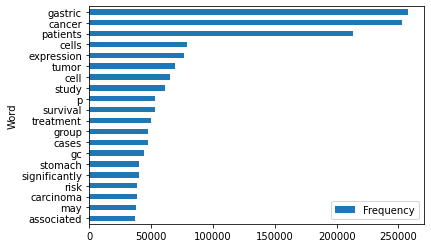

In [89]:
word_count=pd.read_csv('data/word_count.csv')
word_count.sort_values('Frequency', ascending=False).set_index('Word')[:20].sort_values('Frequency', ascending=True).plot(kind='barh')

<AxesSubplot:ylabel='Word'>

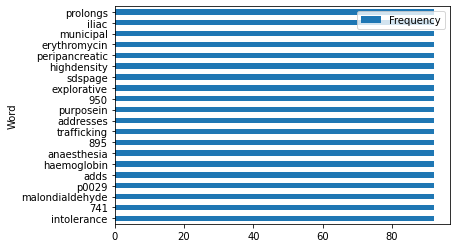

In [92]:
word_count.sort_values('Frequency', ascending=True).set_index('Word')[:20].sort_values('Frequency', ascending=True).plot(kind='barh')

De seguida decidimos calcular a distribuição da frequncia das palavras e obtivemos os seus quartis

In [91]:
word_count.Frequency.quantile([0,0.25,0.5,0.75,1])

0.00        92.0
0.25       148.0
0.50       271.5
0.75       765.0
1.00    257668.0
Name: Frequency, dtype: float64

Como podemos perceber maioria das palavras aparecem poucas vezes comparativamente com o valor máximo que é 257668. Por isso poderá ser importante para os modelos que vamos construir a seguir utilizar esta análise exploratória

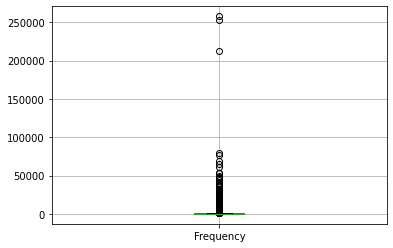

In [23]:
boxplot = word_count.boxplot(column=['Frequency'])
boxplot.plot()

plt.show()